In [1]:
from pyspark import SparkConf, SparkContext
import pandas as pd
import numpy as np
from math import sqrt
import time

%matplotlib inline

In [2]:
conf = SparkConf().setMaster("local[*]")
sc = SparkContext(conf=conf)
rating_data = sc.textFile("full_data/ratings.dat")

In [3]:
def _extract_user_rating(line):
    data = line.split('::')
    return (int(data[1]), float(data[2]))

In [4]:
movie_list = rating_data.map(_extract_user_rating) \
        .aggregateByKey((0, 0), lambda g1,v2: (g1[0]+v2, g1[1]+1), 
                    lambda g1,g2: (g1[0]+g2[0], g1[1]+g2[1])) \
        .map(lambda line: (line[0], line[1][0], line[1][1])).persist()

In [21]:
movie_list.map(lambda x: (x[0], x[2])).saveAsTextFile('movie_count.txt')

In [5]:
movies = movie_list.collect()

In [6]:
movies_pd = pd.DataFrame(movies)

In [7]:
movies_pd[3] = movies_pd[1]/movies_pd[2]

In [8]:
movies_pd.count()

0    10677
1    10677
2    10677
3    10677
dtype: int64

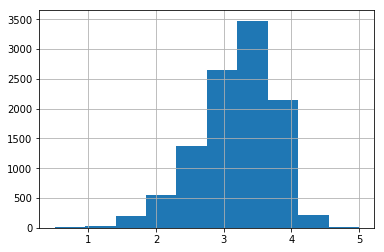

In [9]:
movies_pd[3].hist()

In [10]:
(movies_pd[3] < 2.5).sum()

1268

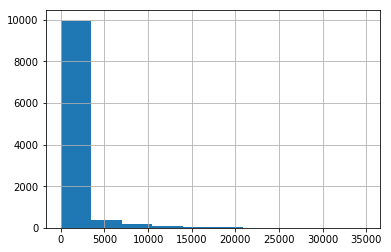

In [11]:
movies_pd[2].hist()

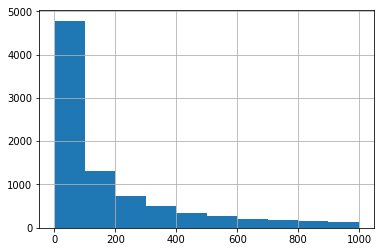

In [12]:
movies_pd[movies_pd[2]<1000][2].hist()

In [13]:
movies_pd[movies_pd[2]<10].count()

0    969
1    969
2    969
3    969
dtype: int64

In [14]:
movies_pd.count()

0    10677
1    10677
2    10677
3    10677
dtype: int64

In [15]:
movies_pd.quantile(.20)

0    2219.20
1      75.50
2      26.00
3       2.74
Name: 0.2, dtype: float64

In [23]:
filtered_movies = movies_pd[((movies_pd[2]>100) & (movies_pd[3] > 4))]
filtered_movies.count()

0    364
1    364
2    364
3    364
dtype: int64

In [24]:
filtered_movies[0].to_csv('input/movie_list.txt',index=False)